# 전처리

## 라이브러리 및 데이터 로딩

In [1]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [2]:
data = pd.read_csv('data/train_data_08.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   방송일시       35379 non-null  object 
 1   노출(분)      35379 non-null  float64
 2   마더코드       35379 non-null  int64  
 3   상품코드       35379 non-null  int64  
 4   상품명        35379 non-null  object 
 5   상품군        35379 non-null  object 
 6   판매단가       35379 non-null  int64  
 7   취급액        35379 non-null  float64
 8   세부상품군      35379 non-null  object 
 9   브랜드        35379 non-null  object 
 10  중분류        35379 non-null  object 
 11  소분류        35379 non-null  object 
 12  시청률        35379 non-null  float64
 13  건수         35379 non-null  float64
 14  방송날짜       35379 non-null  object 
 15  방송월        35379 non-null  int64  
 16  방송일        35379 non-null  int64  
 17  방송요일       35379 non-null  int64  
 18  방송시간       35379 non-null  object 
 19  평일/주말      35379 non-null  int64  
 20  공휴일   

In [4]:
# 필요 없는 칼럼 제거
data.drop(['방송일시','마더코드','상품코드','상품명','시청률','건수','방송날짜'], axis=1, inplace=True)
data.drop(['세부상품군','강수량(mm)','풍속(m/s)','습도(%)','전운량(10분위)','평균기온(°C)'], axis=1, inplace=True)

In [5]:
# 일시불 = 1, 무이자 = 2, 포함 x = 0
data.loc[data['무이자/일시불'] == '일시불', '무이자/일시불'] = 1
data.loc[data['무이자/일시불'] == '무이자', '무이자/일시불'] = 2
data.loc[data['무이자/일시불'].isnull(), '무이자/일시불'] = 0
data['무이자/일시불'] = data['무이자/일시불'].astype('int64')

In [6]:
data['무이자/일시불'] = data['무이자/일시불'].astype('int64')

In [7]:
data

,노출(분),상품군,판매단가,취급액,브랜드,중분류,소분류,방송월,방송일,방송요일,방송시간,평일/주말,공휴일,계절,방송회차,무이자/일시불,프라임시간,체감온도,비옴,뉴스건수
0,20.0,의류,39900,2099000.0,테이트,남성의류,니트/가디건,1,1,1,06:00:00,0,1,겨울,1,0,0.0,-9.8,0,336
1,20.0,의류,39900,4371000.0,테이트,여성의류,니트/가디건,1,1,1,06:00:00,0,1,겨울,1,0,0.0,-9.8,0,336
2,20.0,의류,39900,3262000.0,테이트,남성의류,니트/가디건,1,1,1,06:20:00,0,1,겨울,2,0,0.0,-9.8,0,336
3,20.0,의류,39900,6955000.0,테이트,여성의류,니트/가디건,1,1,1,06:20:00,0,1,겨울,2,0,0.0,-9.8,0,336
4,20.0,의류,39900,6672000.0,테이트,남성의류,니트/가디건,1,1,1,06:40:00,0,1,겨울,3,0,0.0,-9.8,0,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35374,20.0,주방,148000,10157000.0,쿠첸,주방가전,전기밥솥,12,31,1,23:40:00,0,0,겨울,2,1,0.0,8.5,0,49
35375,20.0,주방,178000,50929000.0,쿠첸,주방가전,전기밥솥,1,1,2,00:00:00,0,1,겨울,3,2,0.0,-7.0,0,49
35376,20.0,주방,168000,104392000.0,쿠첸,주방가전,전기밥솥,1,1,2,00:00:00,0,1,겨울,3,1,0.0,-7.0,0,49
35377,20.0,주방,158000,13765000.0,쿠첸,주방가전,전기밥솥,1,1,2,00:00:00,0,1,겨울,3,2,0.0,-7.0,0,49


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   노출(분)    35379 non-null  float64
 1   상품군      35379 non-null  object 
 2   판매단가     35379 non-null  int64  
 3   취급액      35379 non-null  float64
 4   브랜드      35379 non-null  object 
 5   중분류      35379 non-null  object 
 6   소분류      35379 non-null  object 
 7   방송월      35379 non-null  int64  
 8   방송일      35379 non-null  int64  
 9   방송요일     35379 non-null  int64  
 10  방송시간     35379 non-null  object 
 11  평일/주말    35379 non-null  int64  
 12  공휴일      35379 non-null  int64  
 13  계절       35379 non-null  object 
 14  방송회차     35379 non-null  int64  
 15  무이자/일시불  35379 non-null  int64  
 16  프라임시간    35379 non-null  float64
 17  체감온도     35379 non-null  float64
 18  비옴       35379 non-null  int64  
 19  뉴스건수     35379 non-null  int64  
dtypes: float64(4), int64(10), object(6)
memory usage: 

C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from current font.
  f

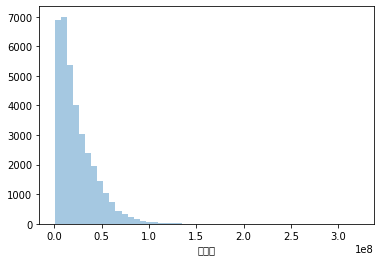

In [9]:
#타겟변수 정규화(로그)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y = data['취급액']
plt.figure(figsize=(6,4))
sns.distplot(y, kde=False)

C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\YOO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from current font.
  f

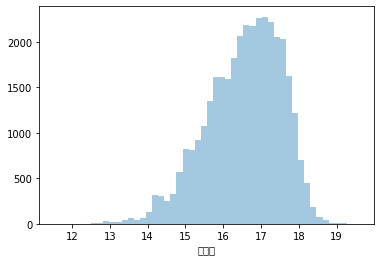

In [10]:
y_log = np.log1p(y)
sns.distplot(y_log, kde=False)

In [11]:
data['취급액'] = np.log1p(data['취급액'])

## 범주형 변수 처리

In [12]:
len(data['브랜드'].unique())

363

In [13]:
cnt_vec = CountVectorizer()
data_brand = cnt_vec.fit_transform(data['브랜드'])

print('brand vectorization shape:',data_brand.shape)

brand vectorization shape: (35379, 369)


In [72]:
cnt_vec = LabelBinarizer()
data_brand = cnt_vec.fit_transform(data['브랜드'])

print('brand vectorization shape:',data_brand.shape)

brand vectorization shape: (35379, 363)


In [14]:
from sklearn.preprocessing import LabelBinarizer

item= LabelBinarizer(sparse_output=True)
data_item = item.fit_transform(data['상품군'])

gung_item= LabelBinarizer(sparse_output=True)
data_gung_item = gung_item.fit_transform(data['중분류'])

so_item= LabelBinarizer(sparse_output=True)
data_so_item = so_item.fit_transform(data['소분류'])

prime= LabelBinarizer(sparse_output=True)
data_prime = prime.fit_transform(data['프라임시간'])

tv_round= LabelBinarizer(sparse_output=True)
data_tv_round = tv_round.fit_transform(data['방송회차'])

card= LabelBinarizer(sparse_output=True)
data_card = card.fit_transform(data['무이자/일시불'])

rain= LabelBinarizer(sparse_output=True)
data_rain = rain.fit_transform(data['비옴'])

In [15]:
print('data_detail_item vectorization shape:',data_gung_item.shape)

data_detail_item vectorization shape: (35379, 46)


In [16]:
time= LabelBinarizer(sparse_output=True)
data_time = time.fit_transform(data['방송시간'])

day= LabelBinarizer(sparse_output=True)
data_day = day.fit_transform(data['방송일'])

month= LabelBinarizer(sparse_output=True)
data_month = month.fit_transform(data['방송월'])

weekday= LabelBinarizer(sparse_output=True)
data_weekday = weekday.fit_transform(data['방송요일'])

weekend= LabelBinarizer(sparse_output=True)
data_weekend = weekend.fit_transform(data['평일/주말'])

holiday= LabelBinarizer(sparse_output=True)
data_holiday = holiday.fit_transform(data['공휴일'])

season= LabelBinarizer(sparse_output=True)
data_season = season.fit_transform(data['계절'])

In [17]:
# 데이터복제
data_copy = data.copy()

In [18]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   노출(분)    35379 non-null  float64
 1   상품군      35379 non-null  object 
 2   판매단가     35379 non-null  int64  
 3   취급액      35379 non-null  float64
 4   브랜드      35379 non-null  object 
 5   중분류      35379 non-null  object 
 6   소분류      35379 non-null  object 
 7   방송월      35379 non-null  int64  
 8   방송일      35379 non-null  int64  
 9   방송요일     35379 non-null  int64  
 10  방송시간     35379 non-null  object 
 11  평일/주말    35379 non-null  int64  
 12  공휴일      35379 non-null  int64  
 13  계절       35379 non-null  object 
 14  방송회차     35379 non-null  int64  
 15  무이자/일시불  35379 non-null  int64  
 16  프라임시간    35379 non-null  float64
 17  체감온도     35379 non-null  float64
 18  비옴       35379 non-null  int64  
 19  뉴스건수     35379 non-null  int64  
dtypes: float64(4), int64(10), object(6)
memory usage: 

In [19]:
# 범주형 변수제거
data_copy.drop(['상품군','중분류','소분류','방송월','방송요일','방송일','방송시간','평일/주말','공휴일','방송회차',
                '계절','브랜드','프라임시간','비옴','무이자/일시불'], axis=1, inplace=True)

In [20]:
print(type(data_item), type(data_gung_item), type(data_season), type(data_brand))
print(type(data_time))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [21]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   노출(분)   35379 non-null  float64
 1   판매단가    35379 non-null  int64  
 2   취급액     35379 non-null  float64
 3   체감온도    35379 non-null  float64
 4   뉴스건수    35379 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.3 MB


# 모델링

## MAPE

In [22]:
#MAPE
from sklearn.metrics import make_scorer

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)


In [23]:
from scipy.sparse import hstack
import gc # 메모리 정리 -> 속도 빨라짐
from sklearn.model_selection import KFold

def model_train_predict(model, matrix_list):
    X=hstack(matrix_list).tocsr()
    X_train, X_test, y_train, y_test = train_test_split(X, data_copy['취급액'], test_size=0.2, random_state=156)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    del X, X_train, X_test, y_train
    gc.collect()
    
    return y_test, preds

In [24]:
# 독립변수 설정
data_copy_target = data_copy.drop('취급액',axis=1)

## 일부 범주형변수만 원핫인코딩 후 모델링

In [25]:
## Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_copy_target)


In [26]:
# 일부 범주형 변수 원핫인코딩

linear_model = Ridge(solver = 'lsqr', fit_intercept=False)

sparse_matrix_list = (scaled_data, data_item, data_gung_item,data_so_item, data_season, data_brand, data_time)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list = sparse_matrix_list)
print(mean_absolute_percentage_error(y_test, linear_preds))

3.1363785612490798


In [27]:
# 일부 범주형 변수 원핫인코딩
 
from lightgbm import LGBMRegressor
sparse_matrix_list = (scaled_data, data_item, data_gung_item,data_so_item, data_season, data_brand, data_time)
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print(mean_absolute_percentage_error(y_test, lgbm_preds))

2.447582085501861


## 모든 범주형변수만 원핫인코딩 후 모델링

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_copy_target)


In [29]:
linear_model = Ridge(solver = 'lsqr', fit_intercept=False)

sparse_matrix_list = (scaled_data, data_card,data_brand,data_item,data_gung_item,data_so_item,data_prime,data_tv_round,data_time,data_day,data_month,data_weekday,data_weekend,data_holiday,data_season,data_rain)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list = sparse_matrix_list)
print(mean_absolute_percentage_error(y_test, linear_preds))

2.8096865423246338


In [73]:

from lightgbm import LGBMRegressor
sparse_matrix_list = (scaled_data, data_card,data_brand,data_item,data_gung_item,data_so_item,data_prime,data_tv_round,data_time,data_day,data_month,data_weekday,data_weekend,data_holiday,data_season,data_rain)
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print(mean_absolute_percentage_error(y_test, lgbm_preds))

2.1299809332215465


### gridsearch

In [74]:
from scipy.sparse import hstack
import gc # 메모리 정리 -> 속도 빨라짐
from sklearn.model_selection import GridSearchCV

def new_model_train_predict(model, matrix_list):
    X=hstack(matrix_list).tocsr()
    X_train, X_test, y_train, y_test = train_test_split(X, data_copy['취급액'], test_size=0.2, random_state=156)
    grid_model = GridSearchCV(model, param_grid={'n_estimators':[1000]}, 
                              scoring=mape_scorer, cv=5)
    grid_model.fit(X_train, y_train)
    print(grid_model.best_estimator_)
    preds = grid_model.predict(X_test)
    del X, X_train, X_test, y_train
    gc.collect()
    
    return grid_model, y_test, preds

In [75]:
from lightgbm import LGBMRegressor
sparse_matrix_list = (scaled_data, data_card,data_brand,data_item,data_gung_item,data_so_item,data_prime,data_tv_round,data_time,data_day,data_month,data_weekday,data_weekend,data_holiday,data_season,data_rain)
lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=125, random_state=156)
fit_lgbm_model, lgbm_preds, y_test = new_model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print(mean_absolute_percentage_error(y_test, lgbm_preds))


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=125, objective=None,
              random_state=156, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
1.9468189355809893


In [251]:
from xgboost import XGBRegressor
sparse_matrix_list = (scaled_data, data_brand,data_item,data_gung_item,data_so_item,data_prime,data_tv_round,data_time,data_day,data_month,data_weekday,data_weekend,data_holiday,data_season,data_rain)
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
fit_xgb_model, xgb_preds, y_test = new_model_train_predict(model=xgb_model, matrix_list=sparse_matrix_list)
print(mean_absolute_percentage_error(y_test, xgb_preds))


[15:25:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:26:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_job

## 혼합

In [54]:
stack_preds = lgbm_preds * 0.5 + xgb_preds * 0.5
print(mean_absolute_percentage_error(y_test, stack_preds))


2.338162028597405


## 선형회귀(선형, 릿지, 라소)

In [255]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sparse_matrix_list = (scaled_data, data_brand,data_item,data_gung_item,data_so_item,data_prime,data_tv_round,data_time,data_day,data_month,data_weekday,data_weekend,data_holiday,data_season,data_rain)
X=hstack(sparse_matrix_list).tocsr()
X_train, X_test, y_train, y_test = train_test_split(X, data_copy['취급액'], test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
# get_rmses(models)


In [256]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring=mape_scorer, cv=5)
    grid_model.fit(X_train, y_train)
    print('{0} 5 CV시 최적 alpha:{1}'.format(model.__class__.__name__,
                                         grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 alpha:{'alpha': 0.1}
Lasso 5 CV시 최적 alpha:{'alpha': 0.001}


In [257]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)
# print(mean_absolute_percentage_error(y_test, ridge_reg))

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# print(mean_absolute_percentage_error(y_test, lasso_reg))


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## stacking

In [258]:
from sklearn.model_selection import KFold

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [259]:
from scipy.sparse import hstack
import gc # 메모리 정리 -> 속도 빨라짐
from sklearn.model_selection import GridSearchCV

def new_model_train_predict(model, matrix_list):
    X=hstack(matrix_list).tocsr()
    X_train, X_test, y_train, y_test = train_test_split(X, data_copy['취급액'], test_size=0.2, random_state=156)
    grid_model = GridSearchCV(model, param_grid={'n_estimators':[1000]}, 
                              scoring=mape_scorer, cv=5)
    grid_model.fit(X_train, y_train)
    print(grid_model.best_estimator_)
    
    return X_train, X_test, y_train, y_test, grid_model

In [260]:
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV

sparse_matrix_list = (scaled_data, data_brand,data_item,data_gung_item,data_so_item,data_prime,data_tv_round,data_time,data_day,data_month,data_weekday,data_weekend,data_holiday,data_season,data_rain)
X=hstack(sparse_matrix_list).tocsr()
X_train, X_test, y_train, y_test = train_test_split(X, data_copy['취급액'], test_size=0.2, random_state=156)

# LGBMRegressor
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=125, random_state=156)
lgbm_grid_model = GridSearchCV(lgbm_model, param_grid={'n_estimators':[1000]}, 
                            scoring=mape_scorer, cv=5)
lgbm_grid_model.fit(X_train, y_train)
print(lgbm_grid_model.best_estimator_)

# XGBRegressor
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
xgb_grid_model = GridSearchCV(xgb_model, param_grid={'n_estimators':[1000]}, 
                            scoring=mape_scorer, cv=5)
xgb_grid_model.fit(X_train, y_train)
print(xgb_grid_model.best_estimator_)

# Ridge, Lasso
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring=mape_scorer, cv=5)
    grid_model.fit(X_train, y_train)
    print('{0} 5 CV시 최적 alpha:{1}'.format(model.__class__.__name__,
                                         grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=125, objective=None,
              random_state=156, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
[15:33:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprec

In [261]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)
# print(mean_absolute_percentage_error(y_test, ridge_reg))

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# print(mean_absolute_percentage_error(y_test, lasso_reg))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [262]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train
X_test_n = X_test
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
xgb_train, xgb_test = get_stacking_base_datasets(xgb_grid_model, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_grid_model, X_train_n, y_train_n, X_test_n, 5)
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)

# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
from sklearn.linear_model import LinearRegression, Ridge, Lasso

meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
print(mean_absolute_percentage_error(y_test, final))


GridSearchCV  model 시작 
	 폴드 세트:  0  시작 


C:\Users\YOO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[15:37:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[15:38:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:43] WARNING: src/objective/regression_obj.cu:152

C:\Users\YOO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
2.1062624203442173


In [267]:
meta_model_ridge = Ridge(alpha=0.1)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_ridge.fit(Stack_final_X_train, y_train)
final = meta_model_ridge.predict(Stack_final_X_test)
print(mean_absolute_percentage_error(y_test, final))

2.1070888029773123


In [268]:
meta_model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=125, random_state=156)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lgbm.fit(Stack_final_X_train, y_train)
final = meta_model_lgbm.predict(Stack_final_X_test)
print(mean_absolute_percentage_error(y_test, final))

2.2639807977679896


In [269]:
meta_model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_xgb.fit(Stack_final_X_train, y_train)
final = meta_model_xgb.predict(Stack_final_X_test)
print(mean_absolute_percentage_error(y_test, final))

[15:55:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2.1198445364608887


# 테스트 데이터 적용

In [35]:
test = pd.read_csv('data/test_data_08.csv')

In [36]:
# test_data2 => 무형 제외 데이터
test_data2 = test[test['상품군']!='무형']

In [37]:
test_data = test_data2.copy()

## 테스트 데이터 전처리

In [38]:
# 필요 없는 칼럼 제거
test_data.drop(['방송일시','마더코드','상품코드','상품명','방송날짜'], axis=1, inplace=True)
test_data.drop(['강수량(mm)','풍속(m/s)','습도(%)','전운량(10분위)','평균기온(°C)'], axis=1, inplace=True)

In [39]:
# 일시불 = 1, 무이자 = 2, 포함 x = 0
test_data.loc[test_data['무이자/일시불'] == '일시불', '무이자/일시불'] = 1
test_data.loc[test_data['무이자/일시불'] == '무이자', '무이자/일시불'] = 2
test_data.loc[test_data['무이자/일시불'].isnull(), '무이자/일시불'] = 0
test_data['무이자/일시불'] = test_data['무이자/일시불'].astype('int64')

In [40]:
test_data

,노출(분),상품군,판매단가,취급액,브랜드,중분류,소분류,방송월,방송일,방송요일,방송시간,평일/주말,공휴일,계절,방송회차,무이자/일시불,프라임시간,체감온도,비옴,뉴스건수
0,20.000000,의류,59800,NaN,잭필드,남성의류,셔츠/남방,6,1,0,06:20:00,0,0,여름,1,0,0.0,16.6,0,1857.0
1,20.000000,의류,59800,NaN,잭필드,남성의류,셔츠/남방,6,1,0,06:40:00,0,0,여름,2,0,0.0,16.6,0,1857.0
2,20.000000,의류,59800,NaN,잭필드,남성의류,셔츠/남방,6,1,0,07:00:00,0,0,여름,3,0,0.0,16.9,0,1857.0
3,20.000000,속옷,69900,NaN,쿠미투니카,여성속옷,팬티,6,1,0,07:20:00,0,0,여름,1,0,1.0,16.9,0,75.0
4,20.000000,속옷,69900,NaN,쿠미투니카,여성속옷,팬티,6,1,0,07:40:00,0,0,여름,2,0,1.0,16.9,0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,10.000000,속옷,99000,NaN,라쉬반,남성속옷,드로즈,7,1,2,00:10:00,0,0,여름,6,1,0.0,18.8,0,37.0
2884,10.000000,속옷,119000,NaN,라쉬반,남성속옷,드로즈,7,1,2,00:10:00,0,0,여름,6,2,0.0,18.8,0,37.0
2885,10.000000,속옷,119000,NaN,라쉬반,남성속옷,드로즈,7,1,2,00:10:00,0,0,여름,6,0,0.0,18.8,0,37.0
2889,20.000000,의류,69900,NaN,아놀드파마,여성의류,블라우스/셔츠,7,1,2,01:20:00,0,0,여름,1,0,0.0,19.0,0,133.0


In [41]:
len(test_data['브랜드'].unique())

137

In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2890
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   노출(분)    2716 non-null   float64
 1   상품군      2716 non-null   object 
 2   판매단가     2716 non-null   int64  
 3   취급액      0 non-null      float64
 4   브랜드      2716 non-null   object 
 5   중분류      2716 non-null   object 
 6   소분류      2716 non-null   object 
 7   방송월      2716 non-null   int64  
 8   방송일      2716 non-null   int64  
 9   방송요일     2716 non-null   int64  
 10  방송시간     2716 non-null   object 
 11  평일/주말    2716 non-null   int64  
 12  공휴일      2716 non-null   int64  
 13  계절       2716 non-null   object 
 14  방송회차     2716 non-null   int64  
 15  무이자/일시불  2716 non-null   int64  
 16  프라임시간    2716 non-null   float64
 17  체감온도     2716 non-null   float64
 18  비옴       2716 non-null   int64  
 19  뉴스건수     2716 non-null   float64
dtypes: float64(5), int64(9), object(6)
memory usage: 445

In [43]:
test_dataset = test_data.drop('취급액', axis=1)
test_dataset = test_dataset.dropna(how='any')
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2890
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   노출(분)    2716 non-null   float64
 1   상품군      2716 non-null   object 
 2   판매단가     2716 non-null   int64  
 3   브랜드      2716 non-null   object 
 4   중분류      2716 non-null   object 
 5   소분류      2716 non-null   object 
 6   방송월      2716 non-null   int64  
 7   방송일      2716 non-null   int64  
 8   방송요일     2716 non-null   int64  
 9   방송시간     2716 non-null   object 
 10  평일/주말    2716 non-null   int64  
 11  공휴일      2716 non-null   int64  
 12  계절       2716 non-null   object 
 13  방송회차     2716 non-null   int64  
 14  무이자/일시불  2716 non-null   int64  
 15  프라임시간    2716 non-null   float64
 16  체감온도     2716 non-null   float64
 17  비옴       2716 non-null   int64  
 18  뉴스건수     2716 non-null   float64
dtypes: float64(4), int64(9), object(6)
memory usage: 424.4+ KB


## 범주형 변수 처리

In [44]:
test_data_brand = cnt_vec.transform(test_dataset['브랜드'])

print('brand vectorization shape:',test_data_brand.shape)

brand vectorization shape: (2716, 369)


In [45]:
from sklearn.preprocessing import LabelBinarizer

test_data_item = item.transform(test_dataset['상품군'])

test_data_prime = prime.transform(test_dataset['프라임시간'])

test_data_tv_round = tv_round.transform(test_dataset['방송회차'])

test_data_rain = rain.transform(test_dataset['비옴'])

test_data_time = time.transform(test_dataset['방송시간'])

test_data_day = day.transform(test_dataset['방송일'])

test_data_month = month.transform(test_dataset['방송월'])

test_data_weekday = weekday.transform(test_dataset['방송요일'])

test_data_weekend = weekend.transform(test_dataset['평일/주말'])

test_data_holiday = holiday.transform(test_dataset['공휴일'])

test_data_season = season.transform(test_dataset['계절'])

test_data_gung_item = gung_item.transform(test_dataset['중분류'])

test_data_so_item = so_item.transform(test_dataset['소분류'])

test_data_card = card.transform(test_dataset['무이자/일시불'])

In [46]:
test_data_copy = test_dataset.copy()

In [47]:
# 범주형 변수제거
test_data_copy.drop(['상품군','중분류','소분류','방송월','방송요일','방송일','방송시간','평일/주말','공휴일','방송회차',
                '계절','브랜드','프라임시간','비옴','무이자/일시불'], axis=1, inplace=True)

In [48]:
test_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   노출(분)   2716 non-null   float64
 1   판매단가    2716 non-null   int64  
 2   체감온도    2716 non-null   float64
 3   뉴스건수    2716 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 106.1 KB


## 취급액 예측

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
test_scaled_data = scaler.fit_transform(test_data_copy)


In [50]:
def new_model_test(model, matrix_list):
    X = hstack(matrix_list).tocsr()
    preds = model.predict(X)
    return preds

In [51]:
from scipy.sparse import hstack
import gc # 메모리 정리 -> 속도 빨라짐
from lightgbm import LGBMRegressor
sparse_matrix_list = (test_scaled_data, test_data_brand,test_data_item,test_data_gung_item,test_data_so_item,test_data_card, 
                      test_data_prime,test_data_tv_round,test_data_time,test_data_day,test_data_month,
                      test_data_weekday,test_data_weekend,test_data_holiday,test_data_season,test_data_rain)
lgbm_test_preds= new_model_test(model=fit_lgbm_model, matrix_list=sparse_matrix_list)


In [52]:
lgbm_test_preds

array([16.14773562, 15.2419595 , 15.60368611, ..., 16.80867411,
       16.00702873, 15.0819955 ])

In [53]:
# 로그값 실제값으로 변환
lgbm_test_preds_real = np.expm1(lgbm_test_preds)

## 실제데이터에 적용

In [59]:
test_data2['취급액'] = lgbm_test_preds_real

C:\Users\YOO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
test_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2890
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   방송일시       2716 non-null   object 
 1   노출(분)      2716 non-null   float64
 2   마더코드       2716 non-null   int64  
 3   상품코드       2716 non-null   int64  
 4   상품명        2716 non-null   object 
 5   상품군        2716 non-null   object 
 6   판매단가       2716 non-null   int64  
 7   취급액        2716 non-null   float64
 8   브랜드        2716 non-null   object 
 9   중분류        2716 non-null   object 
 10  소분류        2716 non-null   object 
 11  방송날짜       2716 non-null   object 
 12  방송월        2716 non-null   int64  
 13  방송일        2716 non-null   int64  
 14  방송요일       2716 non-null   int64  
 15  방송시간       2716 non-null   object 
 16  평일/주말      2716 non-null   int64  
 17  공휴일        2716 non-null   int64  
 18  계절         2716 non-null   object 
 19  방송회차       2716 non-null   int64  
 20  무이자/일시불 

In [61]:
test_data3 = test_data2[['취급액']]
test_data3

,취급액
0,1.030084e+07
1,4.163886e+06
2,5.978534e+06
3,4.386826e+06
4,3.287762e+06
...,...
2883,2.252857e+07
2884,2.101839e+07
2885,1.994869e+07
2889,8.948788e+06


In [62]:
test_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   취급액     2716 non-null   float64
dtypes: float64(1)
memory usage: 42.4 KB


In [66]:
# 편성표 용 데이터 제작(무형 행)
test.drop('취급액',axis=1,inplace=True)
pair = pd.merge(test, test_data3, left_index=True, right_index=True,how='left').reset_index(drop=True)
pair

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,브랜드,중분류,소분류,...,프라임시간,평균기온(°C),강수량(mm),풍속(m/s),습도(%),전운량(10분위),체감온도,비옴,뉴스건수,취급액
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,잭필드,남성의류,셔츠/남방,...,0.0,16.70,0.10,2.90,94.5,6.0,16.6,0,1857.0,1.030084e+07
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,잭필드,남성의류,셔츠/남방,...,0.0,16.70,0.10,2.90,94.5,6.0,16.6,0,1857.0,4.163886e+06
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,잭필드,남성의류,셔츠/남방,...,0.0,16.90,0.00,2.80,90.0,6.0,16.9,0,1857.0,5.978534e+06
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,쿠미투니카,여성속옷,팬티,...,1.0,16.90,0.00,2.80,90.0,6.0,16.9,0,75.0,4.386826e+06
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,쿠미투니카,여성속옷,팬티,...,1.0,16.90,0.00,2.80,90.0,6.0,16.9,0,75.0,3.287762e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN,NaN,NaN,...,0.0,18.35,0.25,2.25,91.5,10.0,18.8,0,NaN,NaN
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN,NaN,NaN,...,0.0,18.35,0.25,2.25,91.5,10.0,18.8,0,NaN,NaN
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN,NaN,NaN,...,0.0,18.50,0.05,2.30,92.5,10.0,19.0,0,NaN,NaN
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,아놀드파마,여성의류,블라우스/셔츠,...,0.0,18.50,0.05,2.30,92.5,10.0,19.0,0,133.0,8.948788e+06


In [69]:
pair.to_csv('data/pair_data.csv',index=False)

In [423]:
# 실제 6월 data에 합병
real_test = pd.read_excel('data/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx',header=1)
real_test

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,NaN


In [434]:
real_test.drop('취급액',axis=1, inplace=True)

In [435]:
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    2891 non-null   datetime64[ns]
 1   노출(분)   1780 non-null   float64       
 2   마더코드    2891 non-null   int64         
 3   상품코드    2891 non-null   int64         
 4   상품명     2891 non-null   object        
 5   상품군     2891 non-null   object        
 6   판매단가    2891 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 158.2+ KB


In [437]:
real_test

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900
...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900


In [449]:
result = pd.merge(real_test, test_data3, left_index=True, right_index=True,how='left').reset_index(drop=True)
result

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,1.030084e+07
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,4.163886e+06
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,5.978534e+06
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,4.386826e+06
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,3.287762e+06
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,8.948788e+06


In [453]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    2891 non-null   datetime64[ns]
 1   노출(분)   1780 non-null   float64       
 2   마더코드    2891 non-null   int64         
 3   상품코드    2891 non-null   int64         
 4   상품명     2891 non-null   object        
 5   상품군     2891 non-null   object        
 6   판매단가    2891 non-null   int64         
 7   취급액     2716 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 180.8+ KB


In [455]:
result.to_csv('data/result.csv', index=False)